# Level 2: Exploring Data

Before continuing on with level 2, make sure you have completed level 1; specifically, we'll be needing the `weather_data.csv` file generated in level 1. This contains weather data from 2013 to 2015, and we'll be exploring that data within this level.

We'll now continue our data project by exploring the treasure trove of data we collected in level 1. This is also an overlooked but important part of data science; it helps us catch errors that may not have come up in the process of obtaining the data. Additionally, it gives us some intuition for the data, which is helpful when it comes to modeling.

Let's get started by reading in the data that we scraped in the last level.

In [1]:
import pandas as pd

data = pd.read_csv('weather_data.csv')

Pandas is an extremely useful and critical tool for data manipulation and processing within Python; here, it simplified our life by allowing us to read in a CSV (Comma Separated Values) file with just one function call. Let's see what it read in by examining the first few rows.

In [2]:
data[:5]

,Month,Day,Year,Mean Temperature,Max Temperature,Min Temperature,Dew Point,Average Humidity,Maximum Humidity,Minimum Humidity,Precipitation,Wind Speed,Max Wind Speed,Max Gust Speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
3,1,4,2013,34,37,30,19,56,63,48,0.00,8,18,28
4,1,5,2013,37,42,32,19,48,56,39,0.00,7,17,26


Awesome, that's exactly what we were expecting! The above table is the first few rows of a *data frame*, which is simply a fancy name for spreadsheets; it just means that we know the different columns and that each column has only one type of data.

To explain the syntax of the last statement, let's consider the case of lists in Python. The same code would give us the first 5 elements of `data` was a list; the same principle applies with a data frame, but instead, we get the first 5 rows of `data`. A sometimes useful mental model is that a data frame is simply a list of lists where each element of the outer list is a list of values associated with one observation of data.

Continuing on the list analogy, let's try finding the `len` of a data frame:

In [3]:
len(data)

1095

It turns out that the `len` of a data frame is simply the number of rows that it has; this is useful to check because we expected to have data on 1095 days because 1095 = 3 * 365. Here's another useful function:

In [4]:
data.shape

(1095, 14)

This function is able to tell us both the number of rows and columns at once, sweet! 1095, as we saw before, is the number of columns, and 14 is the number of columns.

Before going on, let's rename the columns to be lowercase and not contain spaces; this helps with other things down the line that will be pointed out and is also standard data science practice.

In [5]:
column_names = data.columns
new_column_names = []
for column_name in column_names:
    new_column_name = column_name.lower()
    new_column_name = new_column_name.replace(' ', '_')
    new_column_names.append(new_column_name)
data.columns = new_column_names
data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
0,1,1,2013,33,40,26,22,54,64,44,0.00,7,15,26
1,1,2,2013,28,33,22,11,48,57,39,0.00,6,15,22
2,1,3,2013,28,32,24,14,56,68,43,0.00,5,13,20
3,1,4,2013,34,37,30,19,56,63,48,0.00,8,18,28
4,1,5,2013,37,42,32,19,48,56,39,0.00,7,17,26


That did the trick! We can now start accessing particular rows and columns depending on what we want to accomplish.

In [6]:
data.iloc[0]

month                  1
day                    1
year                2013
mean_temperature      33
max_temperature       40
min_temperature       26
dew_point             22
average_humidity      54
maximum_humidity      64
minimum_humidity      44
precipitation       0.00
wind_speed             7
max_wind_speed        15
max_gust_speed        26
Name: 0, dtype: object

This gives us all of the values of the first row of data. Let's try the first column instead:

In [7]:
data.month

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
1065    12
1066    12
1067    12
1068    12
1069    12
1070    12
1071    12
1072    12
1073    12
1074    12
1075    12
1076    12
1077    12
1078    12
1079    12
1080    12
1081    12
1082    12
1083    12
1084    12
1085    12
1086    12
1087    12
1088    12
1089    12
1090    12
1091    12
1092    12
1093    12
1094    12
Name: month, dtype: int64

Great, we can now access whole regions of data using the appropriate syntax depending on whether we want rows or column. Let's now try programatically looking for subsets of the data. For example, say we only wanted the data that was recorded in the month of December.

In [8]:
december_data = data[data.month == 12]
december_data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
334,12,1,2013,43,49,36,29,61,76,46,0.00,2,7,10
335,12,2,2013,45,49,41,34,68,82,53,0.00,3,8,11
336,12,3,2013,46,53,38,34,66,86,46,0.00,3,8,12
337,12,4,2013,47,52,41,36,64,73,54,0.00,3,8,12
338,12,5,2013,54,60,48,50,83,93,72,0.01,2,9,17


We can chain these conditions to ensure that multiple conditions are met. Let's try extracting data from May 2015.

In [18]:
may_2015_data = data[(data.month == 5) & (data.year == 2015)]
may_2015_data[:5]

,month,day,year,mean_temperature,max_temperature,min_temperature,dew_point,average_humidity,maximum_humidity,minimum_humidity,precipitation,wind_speed,max_wind_speed,max_gust_speed
850,5,1,2015,56,63,49,39,59,71,46,0.00,5,14,18
851,5,2,2015,61,74,48,40,56,80,31,0.00,3,15,22
852,5,3,2015,66,80,51,38,41,59,22,0.00,3,10,18
853,5,4,2015,71,85,57,44,47,72,22,0.00,5,15,23
854,5,5,2015,76,85,66,50,44,53,34,0.00,4,13,21


Now that we know how to explore the data, let's look at some techniques for summarizing the data in different columns. First up is the `dtypes` attribute.

In [23]:
data.dtypes

month                int64
day                  int64
year                 int64
mean_temperature     int64
max_temperature      int64
min_temperature      int64
dew_point            int64
average_humidity     int64
maximum_humidity     int64
minimum_humidity     int64
precipitation       object
wind_speed          object
max_wind_speed      object
max_gust_speed      object
dtype: object

This function seems simple because it just prints out the type of each column; however, it's useful if you spot something you don't expect. For example, we expect that `precipitation`, `wind_speed`, `max_wind_speed`, and `max_gust_speed` are all numeric types, but they are currently `object` types. Let's see if we can figure out what's going on. The `unique` function will show us all of the unique values of a particular column.

In [25]:
data.precipitation.unique()

array(['0.00', 'T', '0.55', '0.02', '0.09', '0.12', '0.69', '0.07', '0.22',
       '0.06', '0.04', '0.90', '1.15', '0.38', '0.49', '0.03', '0.15',
       '0.26', '0.01', '0.14', '1.56', '0.19', '0.56', '0.79', '0.60',
       '0.36', '0.17', '0.08', '0.63', '0.05', '3.02', '0.50', '1.09',
       '1.81', '0.30', '0.52', '0.85', '0.87', '0.13', '4.16', '0.48',
       '1.38', '1.26', '0.24', '0.84', '0.53', '0.23', '0.25', '0.31',
       '0.65', '0.46', '0.43', '1.60', '0.72', '0.45', '0.51', '1.98',
       '0.73', '1.20', '0.33', '0.29', '0.11', '0.10', '1.17', '1.43',
       '1.78', '0.16', '0.35', '0.92', '0.21', '0.34', '0.71', '4.97',
       '0.41', '0.37', '1.54', '0.91', '0.40', '1.28', '0.96', '0.39',
       '1.30', '0.62', '0.32', '1.18', '1.11', '1.51', '0.61', '0.20',
       '0.70', '1.24', '1.22', '2.54', '0.80', '2.10', '1.02', '0.67',
       '0.76', '0.81', '0.27', '1.37', '1.46', '0.57', '0.64', '1.12',
       '0.42', '1.95', '1.58', '1.08', '0.89', '1.40', '1.25', '1.21',
 

It looks like we found the problem! While most of the values are things we'd expect for a numeric column, we also have an odd one out: `'T'`. We can automatically convert the whole data frame to be numeric types using the handy `convert_objects` function. 

In [28]:
clean_data = data.convert_objects(convert_numeric = True)
print(clean_data.dtypes)
clean_data.precipitation.unique()

month                 int64
day                   int64
year                  int64
mean_temperature      int64
max_temperature       int64
min_temperature       int64
dew_point             int64
average_humidity      int64
maximum_humidity      int64
minimum_humidity      int64
precipitation       float64
wind_speed          float64
max_wind_speed      float64
max_gust_speed      float64
dtype: object


array([ 0.  ,   nan,  0.55,  0.02,  0.09,  0.12,  0.69,  0.07,  0.22,
        0.06,  0.04,  0.9 ,  1.15,  0.38,  0.49,  0.03,  0.15,  0.26,
        0.01,  0.14,  1.56,  0.19,  0.56,  0.79,  0.6 ,  0.36,  0.17,
        0.08,  0.63,  0.05,  3.02,  0.5 ,  1.09,  1.81,  0.3 ,  0.52,
        0.85,  0.87,  0.13,  4.16,  0.48,  1.38,  1.26,  0.24,  0.84,
        0.53,  0.23,  0.25,  0.31,  0.65,  0.46,  0.43,  1.6 ,  0.72,
        0.45,  0.51,  1.98,  0.73,  1.2 ,  0.33,  0.29,  0.11,  0.1 ,
        1.17,  1.43,  1.78,  0.16,  0.35,  0.92,  0.21,  0.34,  0.71,
        4.97,  0.41,  0.37,  1.54,  0.91,  0.4 ,  1.28,  0.96,  0.39,
        1.3 ,  0.62,  0.32,  1.18,  1.11,  1.51,  0.61,  0.2 ,  0.7 ,
        1.24,  1.22,  2.54,  0.8 ,  2.1 ,  1.02,  0.67,  0.76,  0.81,
        0.27,  1.37,  1.46,  0.57,  0.64,  1.12,  0.42,  1.95,  1.58,
        1.08,  0.89,  1.4 ,  1.25,  1.21,  1.55])

Great, it looks like the conversion did what we expected to for the data types, but it introduced this weird value of `nan`. We can drop the rows containing NAs out of the data frame using the `dropna` function.

In [40]:
clean_data = clean_data.dropna()

Once we have dropped out the rows with weird values, `pandas` still keeps the old row numbering, but we fixed that with the call to `reset_index`, which just calculates the index again. We can now check if any of the values are missing are still there now using a call to `isnull` (which counts `nan` as ture) and `any` which just tells us if a result is all trues. Let's try an example:

In [42]:
print(clean_data.precipitation[:5].isnull())
print(clean_data.precipitation[:5].isnull().any())
print(clean_data.precipitation.isnull().any())

0    False
1    False
2    False
3    False
4    False
Name: precipitation, dtype: bool
False
False


Awesome, now that we have cleaned up our data, let's try using the `describe` function to get a better idea of what's going on in the data.

In [43]:
clean_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,1008,552.229167,315.950136,0,276.5,557.5,825.25,1094.00
month,1008,6.583333,3.420686,1,4.0,7.0,10.00,12.00
day,1008,15.585317,8.798791,1,8.0,15.0,23.00,31.00
year,1008,2014.009921,0.818056,2013,2013.0,2014.0,2015.00,2015.00
mean_temperature,1008,56.093254,18.044831,11,42.0,58.0,72.00,90.00
max_temperature,1008,63.052579,18.898837,18,47.0,65.0,80.00,98.00
min_temperature,1008,48.629960,17.503609,2,35.0,50.0,64.00,83.00
dew_point,1008,40.452381,19.303506,-12,26.0,43.0,56.00,73.00
average_humidity,1008,59.195437,13.629751,27,49.0,58.0,69.00,96.00
maximum_humidity,1008,75.399802,14.968550,39,64.0,76.0,89.00,100.00


(The `transpose` function just turns any data frame sideways; here, it was done for readability.)

The reason that `describe` is so cool is that we get summary statistics for every single column. Everything seems okay, so let's get started on plotting the data to see even more patterns.

We'll be using the matplotlib and Seaborn packages within Python to plot data; Seaborn is built on top of matplotlib but is specifically built for statistical visualizations, which is why we'll prefer to use it. However, some `matplotlib` functions will still be helpful. To start, we'll need the following few lines:

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

These load the packages we need and also tell the notebook how to include our graphics. Great, let's do our first plot now:

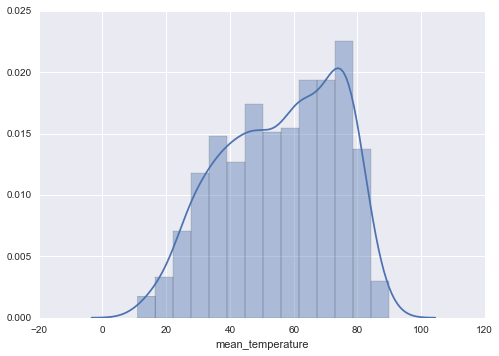

In [55]:
sns.distplot(clean_data.mean_temperature)

This simple plot just visualizes the distribution of the average temperature across all the days we collected data for; specifically, it plots the histogram (the bars) and an estimate of the distribution (the line). We can also just plot the histogram.

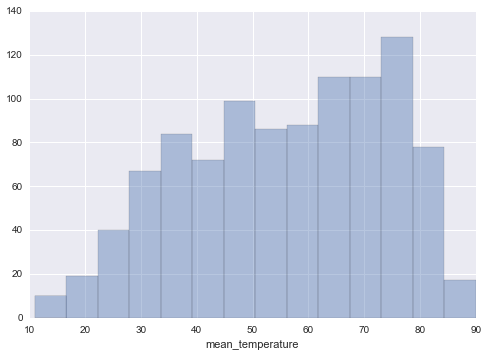

In [56]:
sns.distplot(clean_data.mean_temperature, kde = False)

Neat! Let's add a title and some axis labels.

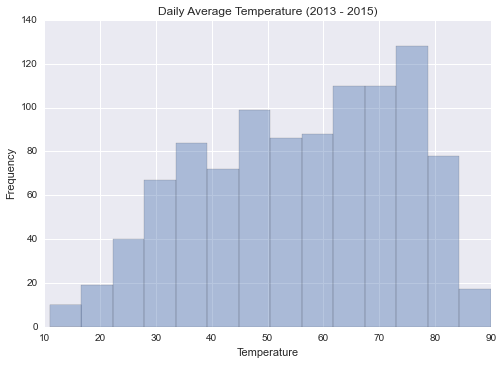

In [73]:
sns.distplot(clean_data.mean_temperature, kde = False)
sns.plt.title('Daily Average Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')

That looks like a pretty fancy graph. Let's zoom in on a portion by setting the limits of the plot; we'll also change the bin size accordingly since we're looking at a portion of the plot.

(0, 50)

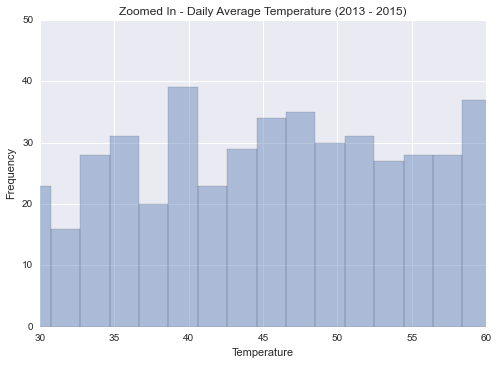

In [72]:
sns.distplot(clean_data.mean_temperature, kde = False, bins = 40)
sns.plt.title('Zoomed In - Daily Average Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')
sns.plt.xlim((30, 60))
sns.plt.ylim((0, 50))

These same functions that we've been using to edit the graph can be used more generally, but let's move on to move interesting graphs. Namely, let's try plotting the histograms of the average and maximum temperature on the same graph.

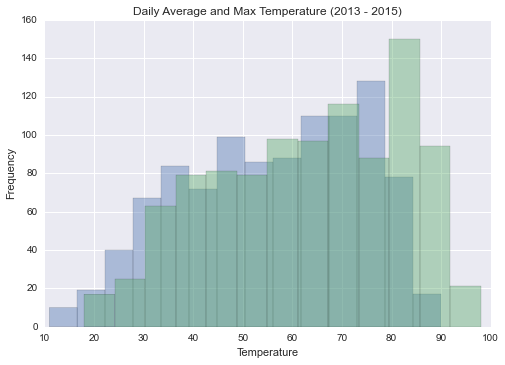

In [74]:
sns.distplot(clean_data.mean_temperature, kde = False)
sns.distplot(clean_data.max_temperature, kde = False)
sns.plt.title('Daily Average and Max Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')

Whoa, cool plot alert! Let's add a legend to make sure someone looking at the plot knows which histogram is which.

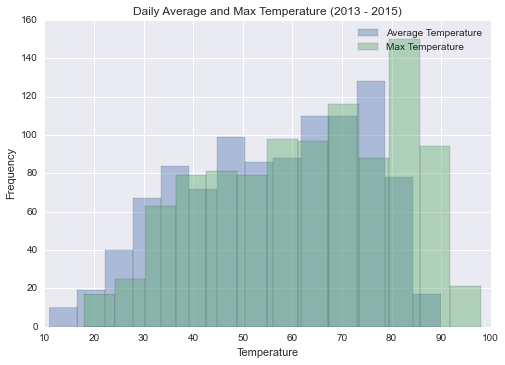

In [84]:
sns.distplot(clean_data.mean_temperature, kde = False, label = "Average Temperature")
sns.distplot(clean_data.max_temperature, kde = False, label = "Max Temperature")
sns.plt.title('Daily Average and Max Temperature (2013 - 2015)')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Frequency')
sns.plt.legend()

We're getting pretty good at this. Let's try plotting a scatterplot to see the relationship between temperature and precipitation.

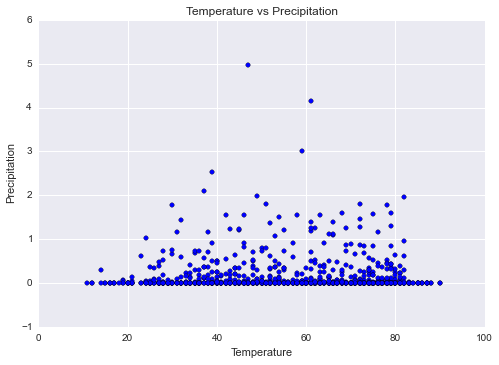

In [87]:
sns.plt.scatter(clean_data.mean_temperature, clean_data.precipitation)
sns.plt.title('Temperature vs Precipitation')
sns.plt.xlabel('Temperature')
sns.plt.ylabel('Precipitation')

This plot can help us think about the next step of modeling the data; it doesn't seem like temperature by itself will do a great job of predicting the amount of precipitation since there's a range of possible precipitation values for each temperature.

It'd be a hassle to do a scatterplot for every possible variable, but luckily, we can use the built in `pairplot` function. (We're only taking a few columns of the `clean_data` data frame though to keep things managable.)

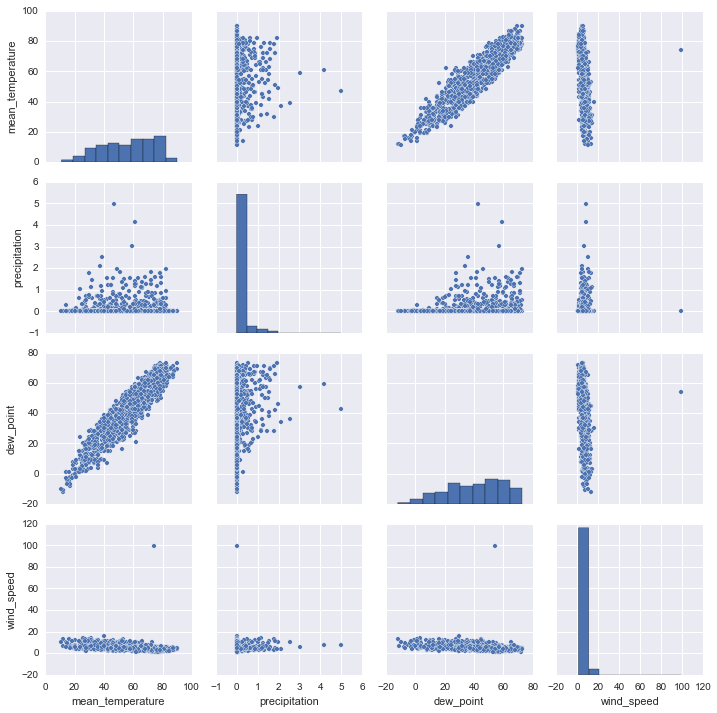

In [93]:
sns.pairplot(data = clean_data[['mean_temperature', 'precipitation', 'dew_point', 'wind_speed']])

In this level, we looked at how to explore our data to make sure nothing's wrong with it and to start thinking about how to model precipitation. Once you're ready, we'll see you on the next level to start modeling the data.